In [ ]:
pip install surprise


     |████████████████████████████████| 11.8MB 12.0MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617663 sha256=23e786933c97f666f22f433d5e388c2316f6a1a013d1ece8a4e069ad7c7431c7
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from surprise import Dataset,Reader
from surprise import NormalPredictor
from surprise.model_selection import cross_validate
from surprise import Prediction
from surprise import SVD, accuracy
from surprise import KNNWithMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from surprise.model_selection import train_test_split


In [ ]:
df_demande_rating  = pd.read_csv('/content/historique - Copie.csv',sep=';',encoding='latin-1')
df_demande_rating.head()

Statut  id livreur  id demande  ...  traffic securite rating
0  effectuee           5       20000  ...        1        1      4
1  effectuee           6       20001  ...        1        0      1
2  effectuee           9       20002  ...        1        1      4
3  effectuee          10       20003  ...        1        1      4
4  effectuee          11       20004  ...        2        1      3

[5 rows x 23 columns]

In [ ]:
df_demande_rating=df_demande_rating.rename(columns={'id livreur':'id_livreur'})

In [ ]:

df_demande_rating.shape

(11040, 23)

In [ ]:
df_demande_rating.describe().T

count  ...           max
id_livreur                     11040.0  ...  5.899000e+03
id demande                     11040.0  ...  3.185300e+04
id_client                      11040.0  ...  1.179800e+04
longitude de point de depart   11040.0  ...  3.000035e+01
latitude de point de depart    11040.0  ...  9.186110e+01
longitude de point d'arrivee   11040.0  ...  3.268472e+01
latitude de point d'arrivee    11040.0  ...  9.496107e+01
distance                       10837.0  ...  2.909667e+06
duration                       10837.0  ...  2.189060e+05
traffic                        11040.0  ...  2.000000e+00
securite                       11040.0  ...  1.000000e+00
rating                         11040.0  ...  5.000000e+00

[12 rows x 8 columns]

In [ ]:
df_demande_rating.dtypes

Statut                            object
id_livreur                         int64
id demande                         int64
id_client                          int64
contenu                           object
categorie                         object
Nature                            object
taille                            object
Point de depart                   object
longitude de point de depart     float64
latitude de point de depart      float64
Point d'arrivee                   object
longitude de point d'arrivee     float64
latitude de point d'arrivee      float64
Moyen de transport souhaite       object
heure de livraison                object
date de livraison                 object
weekday_name_dep                  object
distance                         float64
duration                         float64
traffic                            int64
securite                           int64
rating                             int64
dtype: object

In [ ]:
df_demande_rate = df_demande_rating.copy()
df_demande_rate.shape

(11040, 23)

In [ ]:
df_demande_rate['rating'] = round(df_demande_rate['rating'])

In [ ]:
df_demande_rate.head()

Statut  id_livreur  id demande  ...  traffic securite rating
0  effectuee           5       20000  ...        1        1      4
1  effectuee           6       20001  ...        1        0      1
2  effectuee           9       20002  ...        1        1      4
3  effectuee          10       20003  ...        1        1      4
4  effectuee          11       20004  ...        2        1      3

[5 rows x 23 columns]

In [ ]:
df_demande_rate.isna().sum()

Statut                             0
id_livreur                         0
id demande                         0
id_client                          0
contenu                            0
categorie                          0
Nature                             0
taille                             0
Point de depart                    0
longitude de point de depart       0
latitude de point de depart        0
Point d'arrivee                    0
longitude de point d'arrivee       0
latitude de point d'arrivee        0
Moyen de transport souhaite        0
heure de livraison                 1
date de livraison                 20
weekday_name_dep                  20
distance                         203
duration                         203
traffic                            0
securite                           0
rating                             0
dtype: int64

In [ ]:
df_demande_rate['rating'].value_counts()

4    6674
1    1875
5    1703
2     479
3     237
0      72
Name: rating, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


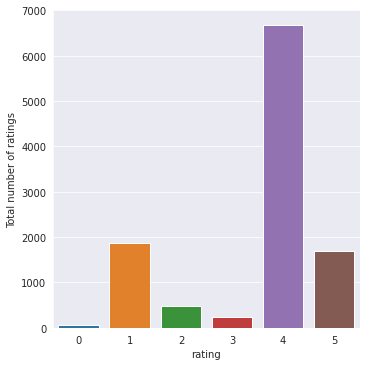

In [ ]:

with sns.axes_style('darkgrid'):
    rating_plot = sns.catplot("rating", data=df_demande_rate, kind='count')
    rating_plot.set_ylabels("Total number of ratings")

In [ ]:

df_demande_rate['rating'] = df_demande_rate['rating'].fillna(df_demande_rate['rating'].mean())

In [ ]:
df_demande_rate['rating'].value_counts()

4    6674
1    1875
5    1703
2     479
3     237
0      72
Name: rating, dtype: int64

In [ ]:
df_demande_rate['rating'] = df_demande_rate['rating'].fillna(df_demande_rate['rating'].median())

In [ ]:
df_demande_rate.dropna(subset=['contenu'],inplace=True)

In [ ]:
df_demande_rate.isna().sum()

Statut                             0
id_livreur                         0
id demande                         0
id_client                          0
contenu                            0
categorie                          0
Nature                             0
taille                             0
Point de depart                    0
longitude de point de depart       0
latitude de point de depart        0
Point d'arrivee                    0
longitude de point d'arrivee       0
latitude de point d'arrivee        0
Moyen de transport souhaite        0
heure de livraison                 1
date de livraison                 20
weekday_name_dep                  20
distance                         203
duration                         203
traffic                            0
securite                           0
rating                             0
dtype: int64

In [ ]:
duplicate = df_demande_rate[df_demande_rate.duplicated(subset=['contenu','id_livreur'])]
duplicate.head(2)

Statut  id_livreur  id demande  ...  traffic securite rating
2144  effectuee        2815       22387  ...        1        1      4
2184  effectuee          23       22430  ...        1        1      4

[2 rows x 23 columns]

In [ ]:
df_demande_rate.duplicated(subset=['contenu','id_livreur']).sum()

626

In [ ]:

df_demande_rate.drop_duplicates(subset=['contenu','id_livreur'],keep='first',inplace=True)
df_demande_rate.duplicated(subset=['contenu','id_livreur']).sum()

0

In [ ]:
df_demande = df_demande_rate.sample(n=10000, random_state=612)
df_demande.shape

(10000, 23)

In [ ]:
df_demande.head()

Statut  id_livreur  id demande  ...  traffic securite rating
7990   effectuee        4158       28652  ...        1        1      4
5466   effectuee         114       25853  ...        1        1      4
10052  effectuee        5629       30742  ...        1        1      4
5725   effectuee         930       26183  ...        1        1      4
10168  effectuee        5833       30859  ...        0        1      5

[5 rows x 23 columns]

In [ ]:
df_demande_final = df_demande[['id_livreur','contenu','rating']]
df_demande_final

id_livreur                contenu  rating
7990         4158                 canape       4
5466          114       tondeuse a gazon       4
10052        5629      fruits et legumes       4
5725          930                   sacs       4
10168        5833       tables de chevet       5
...           ...                    ...     ...
5024          457                 cheval       4
3010         1804                   lits       5
5608          570        sacs et valises       4
10894        1345  scanner et imprimante       2
8953         3582                   chat       4

[10000 rows x 3 columns]

In [ ]:
df_demande_final.shape

(10000, 3)

In [ ]:
df_demande_final.groupby('contenu')['rating'].count().sort_values(ascending=False)

contenu
ordinateur portable               475
scanner et imprimante             473
tables de chevet et lits          395
chaises de bureau                 364
chat                              349
fruits et legumes                 349
disque dur et clavier             329
ordinateur de bureau              327
tables de chevet                  285
souris et clavier                 281
sacs et valises                   276
imprimante                        258
rameurs et velos                  246
tabourets                         241
tables                            239
chaises et canape                 234
chaises                           226
canape                            212
bibliotheques                     211
sacs                              204
four                              202
smart tv                          201
console de jeu                    200
lave vaisselle                    199
rameurs                           199
meubles tv                        197
bure

In [ ]:
df_demande_final.groupby('id_livreur')['rating'].count().sort_values(ascending=False)

id_livreur
292     15
288     15
306     15
321     14
313     14
        ..
5655     1
5114     1
5109     1
5108     1
3389     1
Name: rating, Length: 2337, dtype: int64

In [ ]:
df_grp1 = pd.DataFrame(df_demande_final.groupby('contenu').count())
filter1 = df_grp1['id_livreur'] > 50
filter2 = df_grp1['id_livreur'] > 50
df_grp1.where(filter1 & filter2,inplace=False).dropna().shape

(50, 2)

In [ ]:
df_grp1.where(filter1 & filter2,inplace=False).dropna().head(10)

id_livreur  rating
contenu                               
armoires                 100.0   100.0
banquettes                51.0    51.0
bibliotheques            211.0   211.0
boissons                  82.0    82.0
bureaux de travail       187.0   187.0
camera                   172.0   172.0
canape                   212.0   212.0
chaises                  226.0   226.0
chaises de bureau        364.0   364.0
chaises et canape        234.0   234.0

In [ ]:
ratings_mean_count = pd.DataFrame(df_demande_final.groupby('contenu')['rating'].mean())

In [ ]:
ratings_mean_count['rating_counts'] = pd.DataFrame(df_demande_final.groupby('contenu')['rating'].count())

In [ ]:
ratings_mean_count.head()

rating  rating_counts
contenu                                   
armoires           3.600000            100
banquettes         3.725490             51
bibliotheques      3.691943            211
boissons           3.451220             82
boissons et fruit  2.804878             41

In [ ]:
ratings_mean_count['top'] = ratings_mean_count['rating_counts']*ratings_mean_count['rating']

In [ ]:
#### Top 5 demande
ratings_mean_count.sort_values(by='top', ascending=False).head(5)

rating  rating_counts     top
contenu                                                  
ordinateur portable       3.675789            475  1746.0
scanner et imprimante     3.448203            473  1631.0
tables de chevet et lits  3.369620            395  1331.0
chaises de bureau         3.609890            364  1314.0
chat                      3.467049            349  1210.0

In [ ]:
pip install surprise

In [ ]:
# Transform data to surprise format


In [ ]:
reader = Reader(rating_scale=(1, 10))

In [ ]:
df_demande_sample = df_demande_final.sample(n=5000,random_state=42,replace=True)

In [ ]:
df_demande_sample.shape

(5000, 3)

In [ ]:
data = Dataset.load_from_df(df_demande_sample[['id_livreur','contenu','rating']], reader = reader)

In [ ]:
data.df

id_livreur                contenu  rating
4373        1355      souris et clavier       5
2902        1511                rameurs       4
4849          34      fruits et legumes       4
7933        4010   ordinateur de bureau       4
167          535                 tables       4
...          ...                    ...     ...
581         1782      souris et clavier       4
2362        3605   ordinateur de bureau       1
6886        4093        sacs et valises       1
1393        3890             imprimante       4
1075        3063  disque dur et clavier       4

[5000 rows x 3 columns]

In [ ]:
svd_model = SVD ()
X, y = train_test_split(data,test_size=0.25,random_state=42)



In [ ]:
svd_model.fit(X)


In [ ]:
y_pred = svd_model.test(y)
accuracy.rmse(y_pred)

RMSE: 1.1599


1.1598919117646782

In [ ]:
y_pred

[Prediction(uid=3371, iid='tables de chevet', r_ui=4.0, est=3.6688561532061477, details={'was_impossible': False}),
 Prediction(uid=1824, iid='canape', r_ui=4.0, est=3.5976674964246533, details={'was_impossible': False}),
 Prediction(uid=617, iid='smart tv', r_ui=4.0, est=3.473807934180779, details={'was_impossible': False}),
 Prediction(uid=1071, iid='fauteuils', r_ui=1.0, est=3.195122828865091, details={'was_impossible': False}),
 Prediction(uid=294, iid='camera', r_ui=5.0, est=3.30864850282319, details={'was_impossible': False}),
 Prediction(uid=421, iid='lits', r_ui=1.0, est=3.34066190098543, details={'was_impossible': False}),
 Prediction(uid=2624, iid='ordinateur de bureau', r_ui=4.0, est=3.5877772662013587, details={'was_impossible': False}),
 Prediction(uid=3923, iid='ordinateur portable', r_ui=4.0, est=3.419107173926621, details={'was_impossible': False}),
 Prediction(uid=1622, iid='souris et clavier', r_ui=3.0, est=3.3825477354555455, details={'was_impossible': False}),
 Pred

In [ ]:
test_pred_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in y_pred])

In [ ]:
test_pred_df

0                         1         2
0     3371          tables de chevet  3.668856
1     1824                    canape  3.597667
2      617                  smart tv  3.473808
3     1071                 fauteuils  3.195123
4      294                    camera  3.308649
...    ...                       ...       ...
1245  3633             bibliotheques  3.934719
1246   374     disque dur et clavier  3.719654
1247   164                disque dur  3.473173
1248  3746                 tabourets  3.259201
1249   120  tables de chevet et lits  3.810770

[1250 rows x 3 columns]

In [ ]:
# User Based Model
knn_model_user = KNNWithMeans(k=50, sim_options={'name': 'cosine', 'user_based': True})

knn_model_user.fit(X)

Computing the cosine similarity matrix...


/usr/local/lib/python3.7/dist-packages/surprise/prediction_algorithms/algo_base.py:249: RuntimeWarning: invalid value encountered in double_scalars
  sim = construction_func[name](*args)


Done computing similarity matrix.


In [ ]:
# Item Based Model
knn_model_item = KNNWithMeans(k=50, sim_options={'name': 'cosine', 'user_based': False})

knn_model_item.fit(X)

Computing the cosine similarity matrix...
Done computing similarity matrix.


/usr/local/lib/python3.7/dist-packages/surprise/prediction_algorithms/algo_base.py:249: RuntimeWarning: invalid value encountered in double_scalars
  sim = construction_func[name](*args)


In [ ]:
y_pred_user = knn_model_user.test(y)
y_pred_item = knn_model_item.test(y)

In [ ]:
print("User-based Model : Accuracy RMSE)")
accuracy.rmse(y_pred_user)

User-based Model : Accuracy RMSE)
RMSE: 1.4542


1.4542354753419815

In [ ]:

print("Item-based Model : Accuracy RMSE)")
accuracy.rmse(y_pred_item)

Item-based Model : Accuracy RMSE)
RMSE: 1.3642


1.3641521765346607

In [ ]:
# User based model test prediction output
test_pred_user_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in y_pred_user])
test_pred_user_df.head(5)

0                 1         2
0  3371  tables de chevet  3.509333
1  1824            canape  5.833333
2   617          smart tv  3.509333
3  1071         fauteuils  4.000000
4   294            camera  2.500000

In [ ]:

# Item based model test prediction output
test_pred_item_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in y_pred_item])
test_pred_item_df.head(5)

0                 1         2
0  3371  tables de chevet  3.509333
1  1824            canape  4.658565
2   617          smart tv  3.509333
3  1071         fauteuils  3.548325
4   294            camera  3.423077

In [ ]:
# Predict score for one sample test user
knn_model_user.predict(uid="38",iid="souris")

Prediction(uid='38', iid='souris', r_ui=None, est=3.509333333333333, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [ ]:
# Predicted value for all test users
y_pred_user

[Prediction(uid=3371, iid='tables de chevet', r_ui=4.0, est=3.509333333333333, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=1824, iid='canape', r_ui=4.0, est=5.833333333333334, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid=617, iid='smart tv', r_ui=4.0, est=3.509333333333333, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=1071, iid='fauteuils', r_ui=1.0, est=4.0, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid=294, iid='camera', r_ui=5.0, est=2.5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid=421, iid='lits', r_ui=1.0, est=3.509333333333333, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=2624, iid='ordinateur de bureau', r_ui=4.0, est=4.032, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid=3923, iid='ordinateur portable', r_ui=4.0, est=4.1538571428571425, details={'actu

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


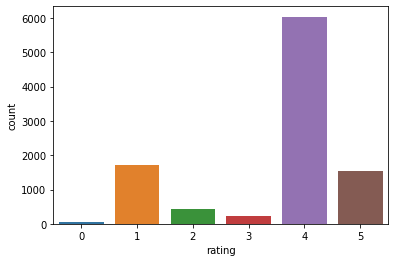

In [ ]:

sns.countplot(df_demande_final['rating'])

In [ ]:
df_pred = pd.DataFrame(y_pred)

In [ ]:
df_pred = pd.DataFrame(y_pred_user)

In [ ]:
# function that takes in user (id_livreur) and number of recommendations as an input and returns the recommended demande
def recommendations(id_livreur, n):
    
    recommended_demande = df_pred [df_pred['uid'] == id_livreur][['uid','iid','est']].sort_values('est', ascending=False).head(n)
  
    return recommended_demande

In [ ]:
# Recommend top 3 demande
recommendations(675,10)

uid         iid       est
447  675  meubles tv  3.717795
986  675    smart tv  3.473613

In [ ]:
# Recommend top 5 demande
recommendations(5,5)

uid     iid       est
626    5  souris  3.722455